In [1]:
%matplotlib inline
import os, sys
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from nilearn import plotting as plotting
from nilearn import image
from nilearn.masking import intersect_masks, apply_mask, unmask
from nilearn.input_data import NiftiMasker
from nilearn.datasets import load_mni152_template, load_mni152_brain_mask, fetch_atlas_destrieux_2009
from nilearn.image import resample_to_img, load_img, index_img

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns

# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

sys.path.append(os.path.join(os.path.dirname(os.getcwd())))
from flow import Paths

/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
# https://nilearn.github.io/auto_examples/04_manipulating_images/plot_resample_to_template.html
Folder, _, _, Subjects = Paths.ExpData(fig_subfolder = 'learning')
ext = '.pdf'

<Figure size 432x288 with 0 Axes>

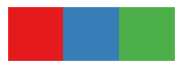

In [3]:
# plotting defaults
sns.set_style("dark");
sns.despine();
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5});

cm_ = sns.color_palette("Set1", 3)
sns.palplot(cm_)
cm = np.array(cm_)
cm = np.concatenate(([cm[1,:]], [cm[1,:]], [cm[2,:]], [cm[0,:]]), axis=0)
cm_map = ListedColormap(cm)

coords = [np.linspace(10,66,6), np.linspace(-60,-30,6)]
modes = ['z', 'x']

In [ ]:
template = load_mni152_template()
mni_mask = load_mni152_brain_mask()
a2009 = fetch_atlas_destrieux_2009(data_dir=Folder['Base'])
stat_img = os.path.join(Folder['Out'], 'group', '1', 'spmT_0001.nii')
th_img = os.path.join(Folder['Out'], 'group', '1', 'spmT_0001_thr.nii')

In [6]:
RoiLabels = pd.read_csv(os.path.join(Folder['SourceData'], 'vois_aparc_2009_labels.tsv'))
vois = [134, 134, 66, 25] # svm results
Labels = RoiLabels.Name[vois].values
print(Labels)
avois = [134, 59, 68, 25] # matching indices with vois above
[a2009.labels[v] for v in avois]

['Occipital Superior Transversal S' 'Occipital Superior Transversal S'
 'Postcentral S' 'Parietal Inferior-Supramarginal G']


[(134, b'R S_oc_sup_and_transversal'),
 (59, b'L S_oc_sup_and_transversal'),
 (68, b'L S_postcentral'),
 (25, b'L G_pariet_inf-Angular')]

In [7]:
# create new atlas for vois
voi_img = []
legend_patch = []
for j, v in enumerate(avois):
    vimg = image.math_img('img == ' + str(v), img=a2009.maps)
    voi_img.append(vimg)
    legend_patch.append(mpatches.Patch(color=cm[j,:], label=Labels[j] ))

voi_atlas = image.concat_imgs(voi_img)

In [9]:
# mni152 mask for statistical image
def mni_masker(img, mask, temp):
    img = resample_to_img(img, temp)
    th = apply_mask(img, mask)
    img = unmask(th, mask)
    return img

th_img = mni_masker(th_img, mni_mask, template)
stat_img = mni_masker(stat_img, mni_mask, template)

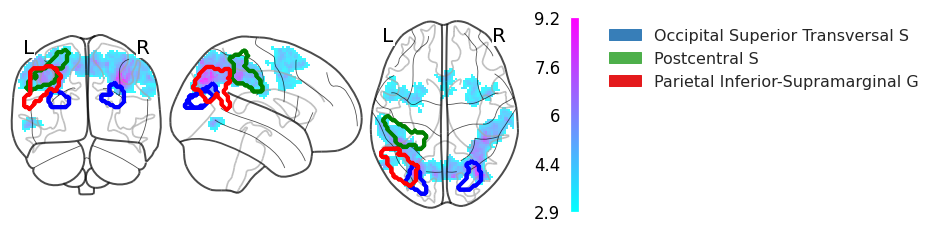

In [10]:
cols = ['b', 'b', 'g', 'r']
fig = plt.figure(figsize=(8,3))
p = plotting.plot_glass_brain(None, figure=fig)
for i,v in enumerate(vois):
    p.add_contours(index_img(voi_atlas, i), colors=cols[i])
p.add_overlay(th_img, colorbar=True, alpha=0.8, cmap='cool')
p.annotate(size=20)
fig.legend(handles=legend_patch[1:4], ncol=1, bbox_to_anchor=(1.62, 1), fontsize=16, frameon=False);

plot_name = 'uni-learning' + ext
fig.savefig(os.path.join(Folder['Fig'], plot_name), bbox_inches = "tight")

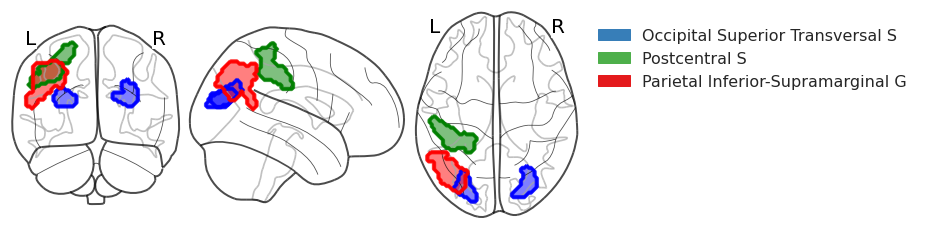

In [11]:
cols = ['b', 'b', 'g', 'r']
fig = plt.figure(figsize=(8,3))
p = plotting.plot_glass_brain(None, figure=fig)
for i,v in enumerate(vois):
    p.add_contours(index_img(voi_atlas, i), colors=cols[i], filled=True, alpha=0.5)
p.annotate(size=20)
fig.legend(handles=legend_patch[1:4], ncol=1, bbox_to_anchor=(1.6, 1), fontsize=16, frameon=False);

plot_name = 'learning' + ext
fig.savefig(os.path.join(Folder['Fig'], plot_name), bbox_inches = "tight")
